In [3]:
from jax import numpy as np
import matplotlib.pyplot as plt

Briefly explain and implement from scratch the following functions: <br>
i) cross-entropy<br>
ii) entropy<br>
iii) mutual information<br>
iv) conditional entropy<br>
v) KL divergence. <br>
Take appropriate example toy data/distributions and explain the insights from calculating these quantities.




# (ii) Entropy <br>
Entropy is a measure of randomness in a system.
It is given by the formula:<br> <center>
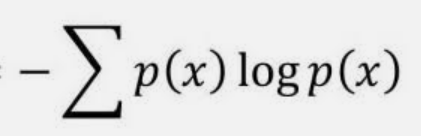
<br>
where p(x) is the probability of an event occurring.</center>

For example, let us assume that there is a box which contains 50 balls, out of which 20 are red and 30 are blue.<br>
p(r) = Probability of getting a red ball = 20/50 = 0.4<br>
p(b) = Probability of getting a blue ball = 30/50 = 0.6<br>
Entropy of this system = -(0.4)*log(0.4) -(0.6)*log(0.6) = 0.67 <br>

Let us now assume that there are 10 colors and the distribution of 100 balls is:<br>
Case i: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]<br>
Case ii: [91, 1, 1, 1, 1, 1, 1, 1, 1, 1]<br>

In [4]:
def entropy(p):
  h = 0
  for i in p:
    h += -i*(np.log(i))
  return h
case_1 = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
case_2 = [91, 1, 1, 1, 1, 1, 1, 1, 1, 1]
prob_case1 = [i/100 for i in case_1]
prob_case2 = [i/100 for i in case_2]
print("Entropy for Case 1:", entropy(prob_case1))
print("Entropy for Case 2:", entropy(prob_case2))

Entropy for Case 1: 2.302585
Entropy for Case 2: 0.500288


As we can see, there is more randomness in case 1 as all colors are equally likely. However, there is less randomness in case 2.<br>
So, the entropy of case 1 is higher than that of case 2.

# (i) Cross-Entropy
Cross Entropy builds on the concept of Entropy. It is used to estimate the difference between two distributions.<br>
Cross Entropy loss is a loss function which is popularly used in classification problems.
The formula for Cross-Entropy is:<br>
<center>

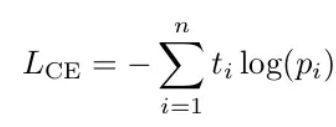

<br>
where t<sub>i</sub> is the true value for the object we are predicting and p<sub>i</sub> is the probability which we have predicted.<br>
</center><br>
For binary classification, this becomes:<br>

<center>

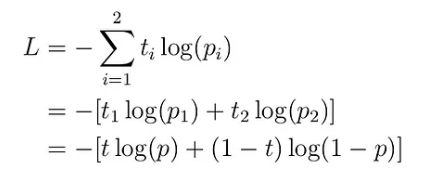

where t takes values 0 or 1(depending on the class) and p is the predicted probability.<br>
</center>
The loss function becomes:<br>
<center>

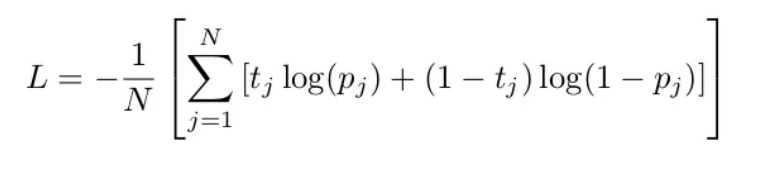

where N is the number of data points.


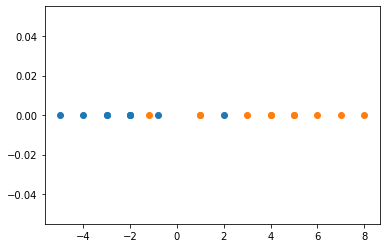

In [5]:
#Let us assume that we have 20 points:
x = [-5, -4, -3, -3, -2, -2, -2, -1.2, -0.8, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8]
t = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] # 0 means blue, 1 means red
# Let some points be blue, and some be red
blue = [-2, -3, -4, -2, -0.8, -2, -5, -3, 2]
red = [-1.2, 1, 4, 3, 5, 7, 4, 8, 5, 1, 6]
plt.scatter(blue, [0 for i in blue])
plt.scatter(red, [0 for i in red])

In [6]:
#Let us assume that using a classification model gives us the following predicted probabilities:
p = [0.001, 0.002, 0.001, 0.01, 0.03, 0.01, 0.05, 0.6, 0.7, 0.6, 0.8, 0.9, 0.8, 0.9, 0.9, 0.99, 0.99, 0.8, 0.9, 0.99]

def cross_entropy(p, t):
  h = 0
  for i in range(20):
    h += (-t[i]*np.log(p[i]) - (1-t[i])*np.log(1-p[i]))
  h = h/20
  return h

print("Cross Entropy Loss for this classification: ", cross_entropy(p,t))

Cross Entropy Loss for this classification:  0.2824864


# (iii) Mutual Information
Mutual Information is a quantity that measures how much information one random variable gives about another random variable.<br>
For example, let X and y be two random variables. X represents the rolling of a dice, and Y represents whether the output is greater than 3. The value of X tells us something about Y and vice-versa. Therefore, these variables share mutual information.

On the other hand, if X denotes roll of a dice and Y denotes roll of a second dice, then both of these random variables are independent. One random variable doesn't tell anything about the other. So, their mutual information is said to be equal to 0.

The formula for Mutual Information is:<br>
<center>

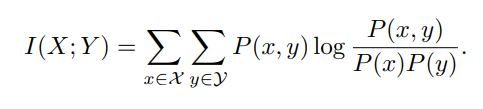

where P(x,y) denotes the joint pdf of X and Y, and P(x) and P(y) are the marginal distributions of X and Y.
</center>
<b>Example:</b>
Let us assume there are 20 people, 8 female and 12 male.
Out of the 20 people, 7(5M, 2F) have a height greater than 6 feet, and the rest have their height less than 6 feet.
We can summarise this info in the following table:

|       | Male | Female | Total |
|:-----:|:----:|:------:|:-----:|
| >6 ft |   5  |    2   |   7   |
| <6 ft |   7  |    6   |   13  |
| Total |  12  |    8   |   20  |

<br>
Taking Probabilities:

<br>

|       | Male | Female | Total |
|:-----:|:----:|:------:|:-----:|
| >6 ft | 0.25 |   0.1  |  0.35 |
| <6 ft | 0.35 |   0.3  |  0.65 |
| Total |  0.6 |   0.4  |   1   |


In [7]:
p_male = 0.6
p_female = 0.4
p_greater = 0.35
p_lesser = 0.65

#Calculating the Mutual Information
mutual_info = 0
mutual_info += (0.25)*np.log(0.25/(0.35*0.6)) #Male and greater than 6ft
mutual_info += (0.1)*np.log(0.1/(0.35*0.4)) #Female and greater than 6ft
mutual_info += (0.35)*np.log(0.35/(0.65*0.6)) #Male and lesser than 6ft
mutual_info += (0.3)*np.log(0.3/(0.65*0.4)) #Female and lesser than 6ft
print("Mutual information value for this classification: ", mutual_info)

Mutual information value for this classification:  0.014996618


As the mutual information is greater than 0, we gain some information about the height of a person if we know their gender.

# (iv) Conditional Entropy

Conditional Entropy is a measure of the information we have about a random variable X if we know the value of a random variable Y.
It is given by the formula:<br>
<center>

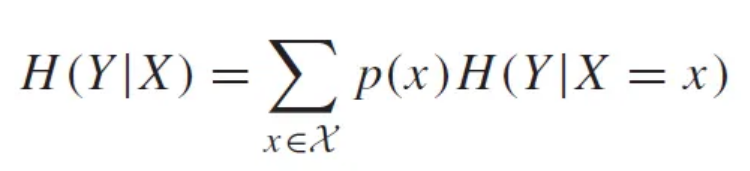

where p(x) is the is the marginal pdf of X, and P(x | y) is the conditional probability.
</center>
The below Venn Diagram depicts the relation between Entropy, Conditional Entropy and Mutual Information:<br>
<center>

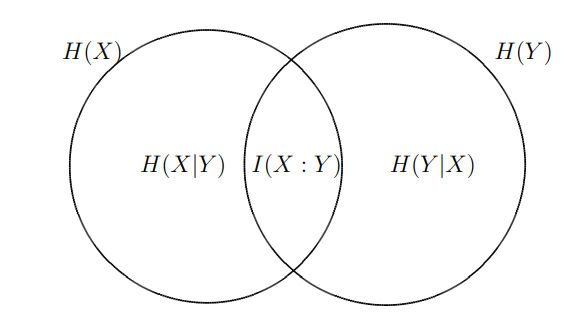

</center>

Let us take the same example as before:

|       | Male | Female | Total |
|:-----:|:----:|:------:|:-----:|
| >6 ft |   5  |    2   |   7   |
| <6 ft |   7  |    6   |   13  |
| Total |  12  |    8   |   20  |

<br>
Taking Probabilities:

<br>

|       | Male | Female | Total |
|:-----:|:----:|:------:|:-----:|
| >6 ft | 0.25 |   0.1  |  0.35 |
| <6 ft | 0.35 |   0.3  |  0.65 |
| Total |  0.6 |   0.4  |   1   |

In [10]:
# Let X be the gender, and Y be the height(>6ft or <6ft)
p_greater = 0.35
p_lesser = 0.65

#Finding out the Conditional Entropy H(Y|X)
# H(Y|X) = p(greater)*H(Y|X=greater) + p(lesser)*H(Y|X=lesser)
h = 0
h += p_greater*(-0.25*np.log(0.25) + (-0.1*np.log(0.1)))
h += p_lesser*(-0.35*np.log(0.35) + (-0.3*np.log(0.3)))
print("Conditional Entropy in this example: ", h)

Conditional Entropy in this example:  0.67550045


# (v) KL Divergence

KL Divergence is given by the formula:<br>
<center>

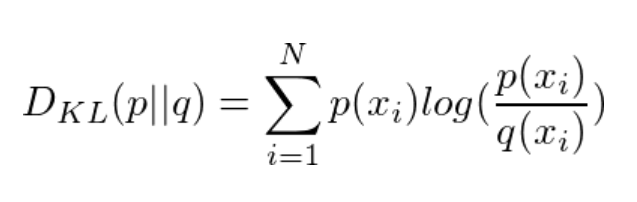

</center>
It is a measure of the difference between two probability distributions over the same variable x.<br>
If we are using a probability distribution q(x) to approximate the density of p(x), then we can measure how good the approximation is by using KL Divergence. Lower the value of KL Divergence, better the approximation.

For example, let us assume that we have the following distribution:<br>
[0.09, 0.11, 0.1, 0.08, 0.12, 0.06, 0.14, 0.1, 0.07, 0.13]

We try approximating it using a Uniform distribution:<br>
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

KL Divergence for this example:  0.030625459


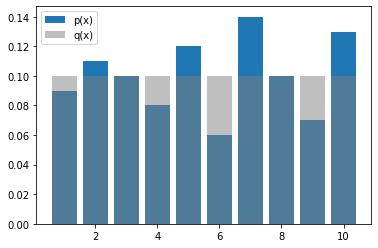

In [9]:
def kl_divergence(p,q):
  kl = 0
  for i in range(10):
    kl += p[i]*np.log(p[i]/q[i])
  return kl

p = [0.09, 0.11, 0.1, 0.08, 0.12, 0.06, 0.14, 0.1, 0.07, 0.13] #Actual Distribution
q = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] #Uniform Distribution
print("KL Divergence for this example: ", kl_divergence(p,q))
plt.bar(np.arange(1,11), p, label = 'p(x)')
plt.bar(np.arange(1,11), q, color = 'grey', alpha = 0.5, label = 'q(x)')
plt.legend()

# Resources Used:

<a href = 'https://www.youtube.com/watch?v=YtebGVx-Fxw'> Entropy </a>

<a href = 'https://machinelearningmastery.com/cross-entropy-for-machine-learning/#:~:text=the%20Same%20Thing-,What%20Is%20Cross%2DEntropy%3F,encode%20and%20transmit%20an%20event.'> Entropy and Cross-Entropy </a>

<a href = 'https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e'> Cross-Entropy </a>

<a href = 'https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a'> Binary Cross-Entropy Loss </a>

<a href='https://people.cs.umass.edu/~elm/Teaching/Docs/mutInf.pdf'> Mutual Information I</a>

<a href='https://www.blog.trainindata.com/mutual-information-with-python/#:~:text=Mutual%20information%20(MI)%20is%20a,values%20of%20the%20second%20variable.'> Mutual Information II</a>

<a href = 'http://www.ece.tufts.edu/ee/194NIT/lect01.pdf'> Conditional Entropy </a>

<a href = 'https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained'> KL Divergence </a>
